# How to Read STELLA models with TARDIS

In [4]:
from pathlib import Path
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import yaml
from scipy import interpolate

from stella_to_tardis_parser import parse_stella_models_to_tardis_configs
from stella_to_tardis_diagnose import *

from tardis.workflows.v_inner_solver import InnerVelocitySolverWorkflow
from tardis.io.configuration.config_reader import Configuration
from tardis.io.model import read_stella_model
from tardis.util.base import is_valid_nuclide_or_elem

from astropy import units as u


# Convert STELLA to TARDIS configs 

In [7]:
# STELLA_model_folder = "/Users/jing/Software/IIp_ddmc/6.4_stripped_1foe_0.03Ni"
# STELLA_model_folder = "/Users/jing/Software/IIp_ddmc/17eaw_pt8foe/NICKEL_0.048"
STELLA_model_folder = "/Users/jing/Software/IIp_ddmc/mesa_explosion"

tardis_example_config_folder_path = "TARDIS_example_configs"

tardis_config_folder = f"{STELLA_model_folder}/tardis_configs"

INTERPOLATE_MASS_FRACTIONS = True  # boolean, if True then interpolate the mass fractions from MESA profile onto STELLA mass grid
SKIP_NONHOMOLOGOUS_MODELS = (
    True  # boolean, if True then skip non-homologous models and not save them
)
MAX_NONHOMOLOGOUS_SHELLS = 5  # int, if active if SKIP_NONHOMOLOGOUS_MODELS is True, the maximum number of non-homologous shells to skip
TAU_UPPER_LIMIT = 1e3  # False or float, filter out the shells that has tau larger than this value
SHRINK_SHELL_NUMBER = False  # False or int, if int then truncate the shell number to this value by skipping even number of shells in between
L_NUC_RATIO_UPPER_LIMIT = (
    0.8  # default 0.8, criteria to determine if the photosphere holds, means L_nuc/L_bol <= 0.8
)

parse_stella_models_to_tardis_configs(
    STELLA_model_folder,
    tardis_example_config_folder_path,
    tardis_config_output_folder_path=None,
    interpolate_mass_fractions=INTERPOLATE_MASS_FRACTIONS,
    skip_nonhomologous_models=SKIP_NONHOMOLOGOUS_MODELS,
    max_nonhomologous_shells=MAX_NONHOMOLOGOUS_SHELLS,
    tau_upper_limit=TAU_UPPER_LIMIT,
    shrink_shell_number=SHRINK_SHELL_NUMBER,
    l_nuc_ratio_upper_limit=L_NUC_RATIO_UPPER_LIMIT,
)

Cr60 is not valid nuiclide in tardis database.
Cr60 is not valid nuiclide in tardis database.
Cr60 is not valid nuiclide in tardis database.
Cr60 is not valid nuiclide in tardis database.
Cr60 is not valid nuiclide in tardis database.
Cr60 is not valid nuiclide in tardis database.
Cr60 is not valid nuiclide in tardis database.
Cr60 is not valid nuiclide in tardis database.
Cr60 is not valid nuiclide in tardis database.
Cr60 is not valid nuiclide in tardis database.


Day 3.0 has more than 5 non-homologous shells, skipping the model
Day 4.0 has more than 5 non-homologous shells, skipping the model
Day 5.0 has more than 5 non-homologous shells, skipping the model
Day 10.0 has more than 5 non-homologous shells, skipping the model


Cr60 is not valid nuiclide in tardis database.
Cr60 is not valid nuiclide in tardis database.
Cr60 is not valid nuiclide in tardis database.
Cr60 is not valid nuiclide in tardis database.
Cr60 is not valid nuiclide in tardis database.
Cr60 is not valid nuiclide in tardis database.
Cr60 is not valid nuiclide in tardis database.
Cr60 is not valid nuiclide in tardis database.


# Check chosen models 

## Check Bolometric LCs

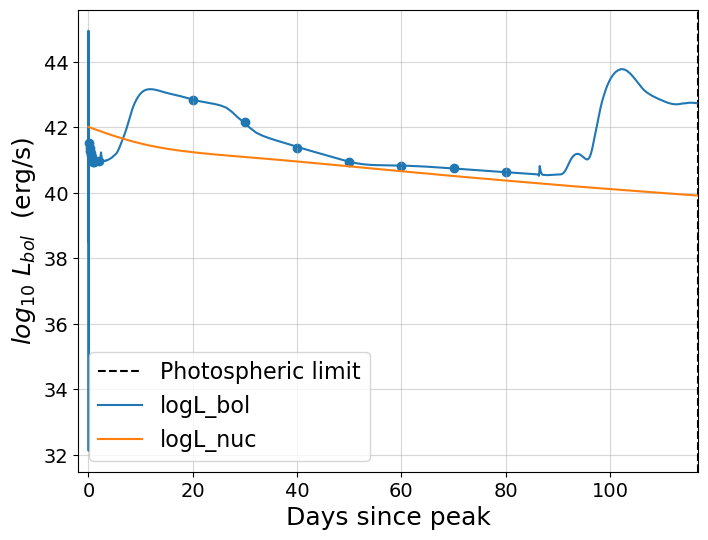

In [8]:
ax = plot_bolometric_LC(
    STELLA_model_folder,
    L_NUC_RATIO_UPPER_LIMIT=L_NUC_RATIO_UPPER_LIMIT,
    tardis_config_folder=tardis_config_folder,
)

## Check profiles 

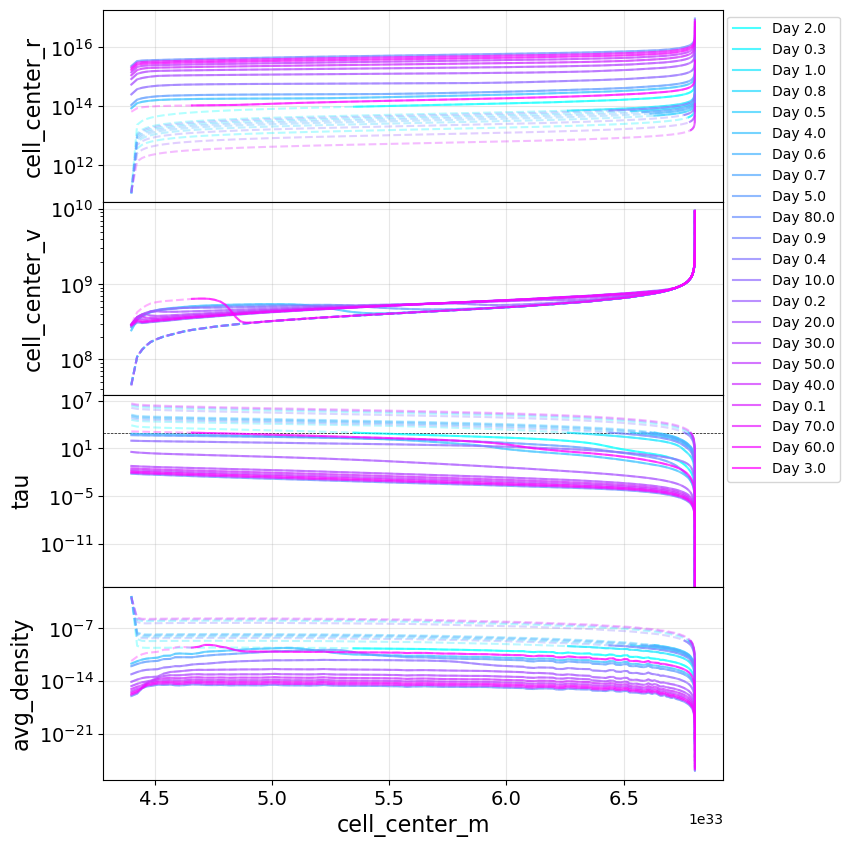

In [10]:
## check homologous expansion
x_col = "cell_center_m"
y_col_s = ["cell_center_r", "cell_center_v", "tau", "avg_density"]
tau_upper_limit = TAU_UPPER_LIMIT
l_nuc_ratio_upper_limit = L_NUC_RATIO_UPPER_LIMIT
# tardis_config_folder = tardis_config_folder
tardis_config_folder = None


fig = plot_profile_data(
    STELLA_model_folder,
    x_col,
    y_col_s,
    tau_upper_limit=tau_upper_limit,
    tardis_config_folder=tardis_config_folder,
)


Index(['mass_of_cell', 'cell_center_m', 'cell_center_r', 'cell_center_v',
       'avg_density', 'radiation_pressure', 'avg_temperature',
       'radiation_temperature', 'avg_opacity', 'tau', 'outer_edge_m',
       'outer_edge_r', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'na23',
       'mg24', 'si28', 's32', 'ar36', 'ca40', 'ti44', 'cr48', 'cr60', 'fe52',
       'fe54', 'fe56', 'co56', 'ni56', 'luminosity', 'n_bar', 'n_e'],
      dtype='object')
SBO_time_in_day 0.0188852264
[py.warnings         ][WARNING]  
	/var/folders/76/8ftp_ypx6dl85qg0_ngn_jpc0000gn/T/ipykernel_53317/3437942159.py:20: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead

 (warnings.py:112)
t_exp_in_day 4.028973049
L_bol_at_chosen_day 3.443499307633377e+42


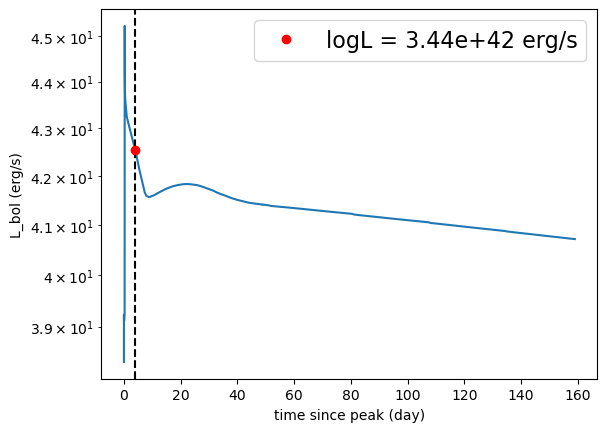

In [8]:
chosen_day = "04"
stella_model = read_stella_model(
    f"{STELLA_model_folder}/res/mesa.day0{chosen_day}_post_Lbol_max.data"
)
print(stella_model.data.columns)

# get the time at shock break out
with open(f"{STELLA_model_folder}/data_at_end.data") as file:
    # Read first 2 lines and replace " (" with "("
    first_two_lines = []
    for i in range(2):
        line = file.readline()
        first_two_lines.append(line.replace(" (", "(").replace("D", "e").split())

SBO_data = pd.DataFrame(first_two_lines[1:], columns=first_two_lines[0])
SBO_time_in_day = float(SBO_data["age(days)"][0])
print("SBO_time_in_day", SBO_time_in_day)

# plot the bolometric LC and get the time relative to SBO and bolometeric luminosity
df_lbol = pd.read_csv(f"{STELLA_model_folder}/res/mesa.lbol", delim_whitespace=True)
plt.plot(df_lbol.time, df_lbol.L_bol)
plt.axvline(x=float(chosen_day), color="k", linestyle="--")
plt.yscale("log")
# plt.xscale("log")
plt.xlabel("time since peak (day)")
plt.ylabel("L_bol (erg/s)")

t_exp_in_day = float(chosen_day) + np.abs(df_lbol.time.min()) + SBO_time_in_day
index_at_chosen_day = np.argmin(np.abs(df_lbol.time - float(chosen_day)))
time_diff = np.abs(df_lbol.time[index_at_chosen_day] - float(chosen_day))
if time_diff > 0.5:
    print(
        f"Warning: The close day is {df_lbol.time[index_at_chosen_day]} and has a time difference of {time_diff} days comparing to the chosen day {chosen_day}"
    )
L_bol_at_chosen_day = (
    10 ** df_lbol["L_bol"].values[df_lbol["time"].sub(float(chosen_day)).abs().idxmin()]
)

print("t_exp_in_day", t_exp_in_day)
print("L_bol_at_chosen_day", L_bol_at_chosen_day)

plt.plot(
    float(chosen_day),
    np.log10(L_bol_at_chosen_day),
    "ro",
    label=f"logL = {L_bol_at_chosen_day:.2e} erg/s",
)
plt.legend(fontsize=16)


# Check composition isotopes 

Profile has 20 isotopes and stella model has 21
na23 is in profile but not in stella model


,he3,ti44,cr48,cr60,fe52,fe54,fe56,co56
0,2.449277e-07,0.000003,0.000004,4.111583e-14,0.000041,0.000085,0.001020,5.950008e-10
1,2.449277e-07,0.000003,0.000004,4.111583e-14,0.000041,0.000085,0.001020,5.950008e-10
2,2.449277e-07,0.000003,0.000004,4.111583e-14,0.000041,0.000085,0.001020,5.950008e-10
3,2.449277e-07,0.000003,0.000004,4.111583e-14,0.000041,0.000085,0.001020,5.950008e-10
4,2.449277e-07,0.000003,0.000004,4.111583e-14,0.000041,0.000085,0.001020,5.950008e-10
...,...,...,...,...,...,...,...,...
1162,2.676528e-22,0.000034,0.000059,5.741461e-13,0.000567,0.000379,0.000989,9.254506e-10
1163,2.676528e-22,0.000034,0.000059,5.741461e-13,0.000567,0.000379,0.000989,9.254506e-10
1164,2.676528e-22,0.000034,0.000059,5.741461e-13,0.000567,0.000379,0.000989,9.254506e-10
1165,2.676528e-22,0.000034,0.000059,5.741461e-13,0.000567,0.000379,0.000989,9.254506e-10


,he3,ti44,cr48,cr60,fe52,fe54,fe56,co56,na23
0,,,,,,,,,
1,2.676528e-22,0.000034,0.000059,5.741461e-13,0.000567,0.000379,0.000989,9.917982e-10,1.919466e-10
2,2.676528e-22,0.000034,0.000059,5.741461e-13,0.000567,0.000379,0.000989,9.917982e-10,1.919466e-10
3,2.676528e-22,0.000034,0.000059,5.741461e-13,0.000567,0.000379,0.000989,9.917982e-10,1.919466e-10
4,2.676528e-22,0.000034,0.000059,5.741461e-13,0.000567,0.000379,0.000989,9.917982e-10,1.919466e-10
5,2.676528e-22,0.000034,0.000059,5.741461e-13,0.000567,0.000379,0.000989,9.917982e-10,1.919466e-10
...,...,...,...,...,...,...,...,...,...
396,2.449277e-07,0.000003,0.000004,4.111583e-14,0.000041,0.000085,0.001020,5.950008e-10,1.348553e-04
397,2.449277e-07,0.000003,0.000004,4.111583e-14,0.000041,0.000085,0.001020,5.950008e-10,1.348553e-04
398,2.449277e-07,0.000003,0.000004,4.111583e-14,0.000041,0.000085,0.001020,5.950008e-10,1.348553e-04


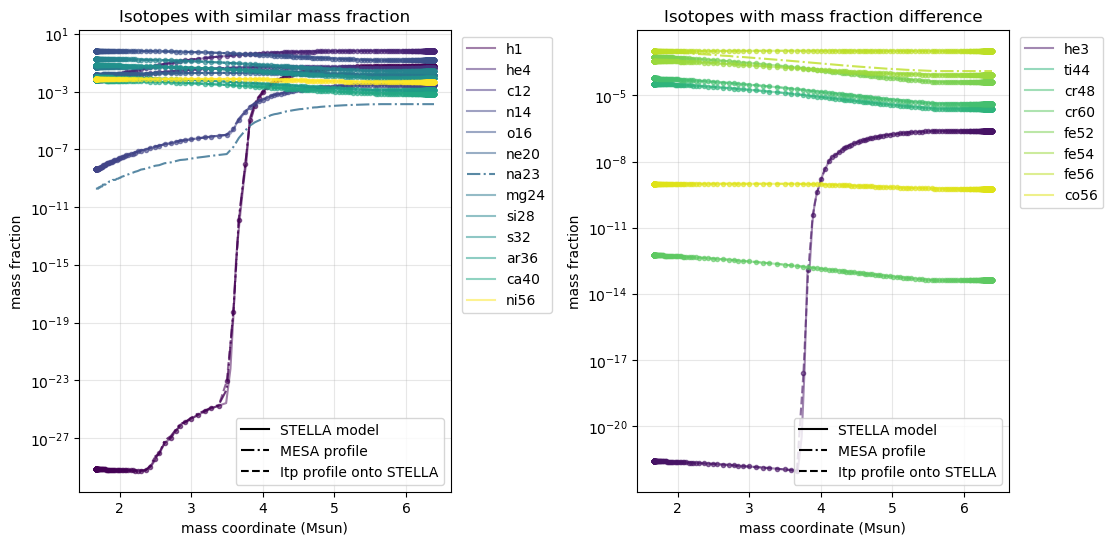

In [ ]:
df_profile = pd.read_csv(f"{STELLA_model_folder}/profile1.data", sep=r"\s+", skiprows=5)
composition_columns_profile = [
    col
    for col in df_profile.columns
    if col[0].isalpha() and col[-1].isdigit() and "_" not in col and col not in ["gamma1", "pnhe4"]
]

if tau_upper_limit is not False:
    df_model_stella = stella_model.data[stella_model.data["tau"] <= tau_upper_limit]
else:
    df_model_stella = stella_model.data.copy()

composition_columns_stella = [
    col for col in df_model_stella.columns if col[0].isalpha() and col[-1].isdigit()
]
print(
    f"Profile has {len(composition_columns_profile)} isotopes and stella model has {len(composition_columns_stella)}"
)

color_set = cm.viridis(np.linspace(0, 1, len(composition_columns_stella)))

trouble_isotopes = []

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)
for i, isotope in enumerate(composition_columns_stella):
    if isotope not in composition_columns_profile:
        print(f"{isotope} is in profile but not in stella model")
        ax.plot(
            df_model_stella["cell_center_m"] * u.g.to(u.Msun),
            df_model_stella[isotope],
            label=isotope,
            alpha=0.8,
            ls="-.",
            color=color_set[i],
        )
    else:
        # compare the mean mass fractions
        center_mass = ((df_profile["mass"].values[:-1] + df_profile["mass"].values[1:]) / 2).astype(
            np.float64
        )[::-1]
        center_mass_fraction = (
            (df_profile[isotope].values[:-1] + df_profile[isotope].values[1:]) / 2
        ).astype(np.float64)[::-1]
        mass_fraction_ratio_tor = 0.5
        mass_fraction_ratio = np.abs(
            df_model_stella[isotope].mean() / np.mean(center_mass_fraction)
        )
        if (
            mass_fraction_ratio >= mass_fraction_ratio_tor
            and mass_fraction_ratio_tor <= 1 / mass_fraction_ratio_tor
        ):
            ax = axes[0]  # plot the ones without large difference
        else:
            ax = axes[1]  # plot the ones with large differences
            trouble_isotopes.append(isotope)
        # plot the stella model composition
        ax.plot(
            df_model_stella["cell_center_m"] * u.g.to(u.Msun),
            df_model_stella[isotope],
            alpha=0.8,
            ls="-.",
            color=color_set[i],
        )
        # plot the profile composition
        ax.plot(center_mass, center_mass_fraction, alpha=0.5, color=color_set[i], label=isotope)
        # interpolate the mass fraction to match the ones in profile
        if INTERPOLATE_MASS_FRACTIONS:
            stella_mass_fraction = df_model_stella[isotope]
            stella_mass_corrdinates = (df_model_stella["cell_center_m"] / (u.Msun.to(u.g))).astype(
                np.float64
            )
            f_itp = interpolate.interp1d(
                center_mass,
                center_mass_fraction,
                kind="linear",
                bounds_error=False,
                fill_value=(center_mass_fraction[0], center_mass_fraction[-1]),
            )
            itp_mass_fraction = f_itp(stella_mass_corrdinates)
            ax.plot(
                df_model_stella["cell_center_m"] * u.g.to(u.Msun),
                itp_mass_fraction,
                alpha=0.6,
                ls="--",
                marker=".",
                color=color_set[i],
            )
            df_model_stella[isotope] = itp_mass_fraction
for ax in axes:
    ax.set_xlabel("mass coordinate (Msun)")
    ax.set_ylabel("mass fraction")
    ax.set_yscale("log")
    # ax.set_ylim(1e-13,1)
    # add a extra legend
    ax.plot([], [], "k-", label="STELLA model")
    ax.plot([], [], "k-.", label="MESA profile")
    ax.plot([], [], "k--", label="Itp profile onto STELLA")
    handles, labels = ax.get_legend_handles_labels()
    leg1 = ax.legend(handles[:-3], labels[:-3], fontsize=10, bbox_to_anchor=(1.01, 1))
    leg2 = ax.legend(handles[-3:], labels[-3:], fontsize=10)
    fig.add_artist(leg1)
    ax.grid(alpha=0.3)
axes[0].set_title("Isotopes with similar mass fraction")
axes[1].set_title("Isotopes with mass fraction difference")

display(df_profile[trouble_isotopes])
trouble_isotopes.append("na23")
display(df_model_stella[trouble_isotopes])


Question spotted: 
- Na is not in MESA profile but in STELLA model?
- Need to check interpolation method to avoid bad interpolations 

In [ ]:
### filter and compute the key information
matter_columns = ["cell_center_v", "avg_density", "radiation_temperature"]
composition_columns_stella = [
    col for col in df_model_stella.columns if col[0].isalpha() and col[-1].isdigit()
]
df_model = df_model_stella[matter_columns + composition_columns_stella]

# update the column names
df_model = df_model.rename(
    columns={
        "cell_center_v": "velocity",
        "avg_density": "density",
        "radiation_temperature": "t_rad",
    }
)
df_model = df_model.rename(
    columns={col: col[0].capitalize() + col[1:] for col in composition_columns_stella}
)

# filter out the columns that are not needed, eg all zero
df_model = df_model.astype(np.float128)
df_model = df_model.loc[:, (df_model != 0).all()]
df_model

,velocity,density,t_rad,H1,He3,He4,C12,N14,O16,Ne20,...,Ar36,Ca40,Ti44,Cr48,Cr60,Fe52,Fe54,Fe56,Co56,Ni56
0,,,,,,,,,,,,,,,,,,,,,
122,3.749658e+08,1.529757e-10,30455.232037,0.005976,1.960499e-08,0.494439,0.051009,0.000632,0.308486,0.018908,...,0.002994,0.001763,0.000007,0.000012,1.183228e-13,0.000117,0.000129,0.001047,8.791005e-10,0.006684
123,3.812582e+08,1.344691e-10,29641.652544,0.007681,2.608641e-08,0.504730,0.051007,0.000724,0.300074,0.018753,...,0.002898,0.001706,0.000007,0.000012,1.139074e-13,0.000113,0.000127,0.001046,8.673829e-10,0.006595
124,3.865032e+08,1.223552e-10,28900.304075,0.009756,3.406568e-08,0.515945,0.050959,0.000831,0.290779,0.018572,...,0.002792,0.001644,0.000007,0.000011,1.090934e-13,0.000108,0.000124,0.001044,8.539618e-10,0.006493
125,3.913582e+08,1.136639e-10,28357.106399,0.011568,4.111416e-08,0.524580,0.050879,0.000919,0.283495,0.018420,...,0.002710,0.001595,0.000006,0.000011,1.053836e-13,0.000104,0.000122,0.001043,8.429831e-10,0.006409
126,3.964618e+08,1.068126e-10,27903.707624,0.012689,4.550241e-08,0.529567,0.050816,0.000973,0.279243,0.018327,...,0.002662,0.001567,0.000006,0.000011,1.032401e-13,0.000102,0.000121,0.001043,8.364163e-10,0.006359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1.915926e+09,5.460173e-15,7861.991719,0.062221,2.449277e-07,0.673588,0.045476,0.003025,0.146265,0.014670,...,0.001232,0.000724,0.000003,0.000004,4.111583e-14,0.000041,0.000085,0.001020,5.950008e-10,0.004524
397,1.962913e+09,4.847349e-15,7598.724100,0.062221,2.449277e-07,0.673588,0.045476,0.003025,0.146265,0.014670,...,0.001232,0.000724,0.000003,0.000004,4.111583e-14,0.000041,0.000085,0.001020,5.950008e-10,0.004524
398,2.023322e+09,4.603179e-15,7334.444702,0.062221,2.449277e-07,0.673588,0.045476,0.003025,0.146265,0.014670,...,0.001232,0.000724,0.000003,0.000004,4.111583e-14,0.000041,0.000085,0.001020,5.950008e-10,0.004524


In [ ]:
from stella_to_tardis_parser import parse_stella_models_to_tardis_configs

stella_folder = "/Users/jing/Software/IIp_ddmc/6.4_stripped_1foe_0.03Ni"
parse_stella_models_to_tardis_configs(stella_folder, stella_folder)

SyntaxError: invalid syntax (stella_to_tardis_parser.py, line 89)

In [ ]:
import glob

stella_output_files = sorted(glob.glob(f"{stella_folder}/res/mesa.day*"))
stella_output_files

days_stella_profiles = [
    float(file.split("/")[-1].split("_")[0].split("day")[1]) for file in stella_output_files
]
days_stella_profiles

[0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 10.0,
 20.0,
 30.0,
 40.0,
 50.0,
 60.0,
 70.0,
 80.0,
 90.0,
 100.0,
 110.0,
 120.0,
 130.0,
 140.0,
 150.0,
 160.0]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


/var/folders/76/8ftp_ypx6dl85qg0_ngn_jpc0000gn/T/ipykernel_32310/383851115.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file,delim_whitespace=True,skiprows=1,header=None)
/var/folders/76/8ftp_ypx6dl85qg0_ngn_jpc0000gn/T/ipykernel_32310/383851115.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_bol = pd.read_csv(file1,delim_whitespace=True,skiprows=1,header=None)


,0,1,2,3,4
0,-0.010088,38.169,38.330,37.630,37.377
1,-0.010088,38.169,38.330,37.630,37.377
2,-0.010088,38.169,38.330,37.630,37.377
3,-0.010088,38.169,38.330,37.630,37.377
4,-0.010088,38.169,38.330,37.630,37.377
...,...,...,...,...,...
1339,154.584579,40.221,40.745,34.045,40.591
1340,155.662338,40.215,40.739,34.027,40.584
1341,156.740097,40.208,40.732,34.008,40.578
1342,157.817856,40.202,40.725,33.989,40.571


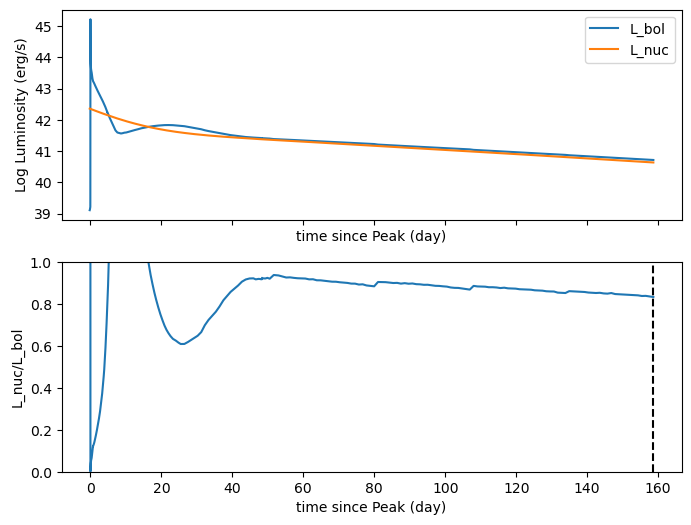

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
axes[0].plot(df[0], df[1], label="L_bol")
axes[0].plot(df[0], df[2], label="L_nuc")
axes[0].legend()
axes[0].set_xlabel("time since Peak (day)")
axes[0].set_ylabel("Log Luminosity (erg/s)")

axes[1].plot(df[0], 10 ** (df[2] - df[1]))
axes[1].set_xlabel("time since Peak (day)")
axes[1].set_ylabel("L_nuc/L_bol")
axes[1].set_ylim(0, 1)

ratio = 1.0
idx = np.where(10 ** (df[2] - df[1]) <= ratio)[0][-1]
plt.gca().axvline(x=df[0].values[idx], color="k", ls="--")